In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/SecurityProject
fname = "data_tcp_600.csv"
stream = os.popen("find . -name '%s'" % fname)
fpath = stream.read()[:-1]
data_tcp= pd.read_csv(fpath)
fname = "data_udp_10.csv"
stream = os.popen("find . -name '%s'" % fname)
fpath = stream.read()[:-1]
data_udp = pd.read_csv(fpath)
fname = "data_icmp_60.csv"
stream = os.popen("find . -name '%s'" % fname)
fpath = stream.read()[:-1]
data_icmp = pd.read_csv(fpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/SecurityProject


In [69]:
#rescaling dataset and setting feature
feature1 = 'ts',
feature2 = 'src_ip'
feature3 = 'src_port'
feature4 = 'dst_ip'
feature5 = 'dst_port'
feature6 = 'pck_len'
feature7 = 'tcp_flags'
feature8 = 'cluster'
feature9 = 'user'
feature10 = 'num_attack'
feature11 = 'first_port_scan'
feature12 = 'ip_diff'
feature13 = 'port_diff'
feature14 = 'range_ip'
feature15 = 'range_port'
feature16 = 'ip_medium'
feature17 = 'ip_std'
feature18 = 'port_medium'
feature19 = 'port_std'
feature20 = 'pck_medium'
feature21 = 'pck_std'
rescaled_data_tcp = pd.DataFrame(StandardScaler().fit_transform(data_tcp), columns=data_tcp.columns)
rescaled_data_udp = pd.DataFrame(StandardScaler().fit_transform(data_udp), columns=data_udp.columns)
rescaled_data_icmp = pd.DataFrame(StandardScaler().fit_transform(data_icmp), columns=data_icmp.columns)
#cluster creation with kmeans
kmeans_tcp = KMeans(n_clusters=4)
kmeans_udp = KMeans(n_clusters=4)
kmeans_icmp = KMeans(n_clusters=4)
cluster_tcp = kmeans_tcp.fit_predict(rescaled_data_tcp[[feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21]])
cluster_udp = kmeans_udp.fit_predict(rescaled_data_udp[[feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21]])
cluster_icmp = kmeans_icmp.fit_predict(rescaled_data_icmp[[feature9,feature10,feature12,feature14,feature16,feature17,feature20,feature21]])
#y1 = kmeans.fit_predict(prova)
rescaled_data_tcp['cluster'] = cluster_tcp
rescaled_data_udp['cluster'] = cluster_udp
rescaled_data_icmp['cluster'] = cluster_icmp
detail_tcp = rescaled_data_tcp.groupby(['cluster']).size()
detail_udp = rescaled_data_udp.groupby(['cluster']).size()
detail_icmp = rescaled_data_icmp.groupby(['cluster']).size()
print(detail_tcp)
print(detail_udp)
print(detail_icmp)

cluster
0    15541
1     9102
2    28365
3     8198
dtype: int64
cluster
0    6787
1    3888
2    2786
3       8
dtype: int64
cluster
0     45
1    331
2     80
3     66
dtype: int64


In [70]:
#remove artificial feature
rescaled_data_tcp.drop([feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21], axis = 1,inplace=True)
rescaled_data_udp.drop([feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21], axis = 1,inplace=True)
rescaled_data_icmp.drop([feature9,feature10,feature12,feature14,feature16,feature17,feature20,feature21], axis = 1,inplace=True)

In [75]:
#evaluating perfomance clustering
score_tcp = silhouette_score(rescaled_data_tcp,kmeans_tcp.labels_)
score_udp = silhouette_score(rescaled_data_udp,kmeans_udp.labels_)
score_icmp = silhouette_score(rescaled_data_icmp,kmeans_icmp.labels_)
print(score_tcp)
print(score_udp)
print(score_icmp)

0.1770902082875341
0.3804924640400536
0.5025539679133908


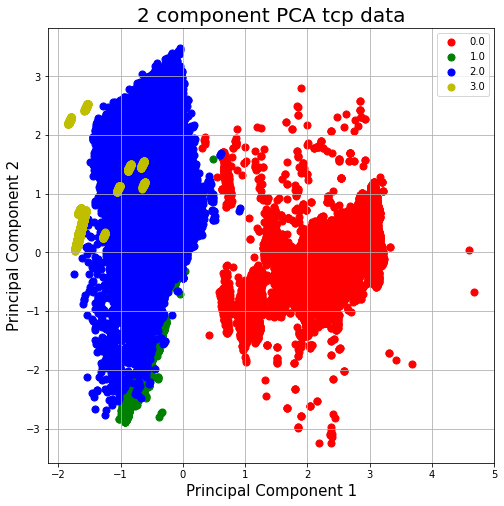

In [72]:
#display results tcp
#features = [feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8]
#x = rescaled_data_tcp.loc[:, features].values()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rescaled_data_tcp)
#principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([principalDf, rescaled_data_tcp[['cluster']]], axis = 1)
final_df.dropna(inplace=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA tcp data', fontsize = 20)
targets = [0.0, 1.0, 2.0,3.0]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cluster'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

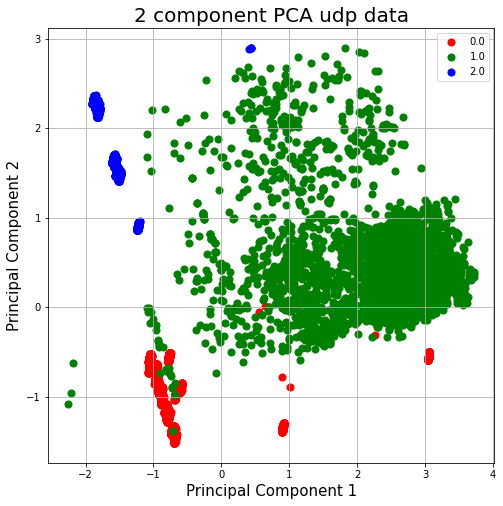

In [73]:
#display results udp
#features = [feature1,feature2,feature3,feature4,feature5,feature6,feature8]
#x = rescaled_data_udp.loc[:, features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rescaled_data_udp)
#principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([principalDf, rescaled_data_udp[['cluster']]], axis = 1)
final_df.dropna(inplace=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA udp data', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cluster'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

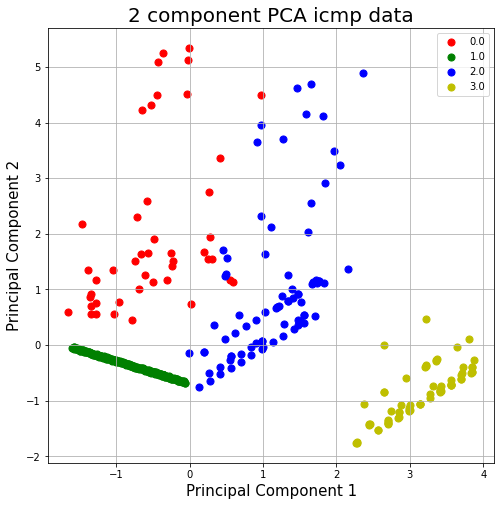

In [74]:
#display results icmp
#features = [feature1,feature6,feature8,feature9]
#x = rescaled_data_icmp.loc[:, features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rescaled_data_icmp)
#principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([principalDf, rescaled_data_icmp[['cluster']]], axis = 1)
final_df.dropna(inplace=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA icmp data', fontsize = 20)
targets = [0.0, 1.0, 2.0,3.0]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cluster'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()